In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [269]:
df=pd.read_csv('mobile_sales_data.csv')
df

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Laptop,Motorola,8C187637,Pick build kind teach mean each camera.,170385,2024-03-02,2024-04-11,6,Sara Gomez,Sylviatown,North,i3,i3,16GB,512GB,2TB
49996,Laptop,HP,0DA9E4D3,Outside policy treat he opportunity pattern.,193133,2025-01-19,2025-01-20,4,Raymond Clark,Chrismouth,West,i7,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,CAD89A93,Test floor tax together out adult discover own...,66502,2024-01-16,2024-03-05,6,Joseph Martin,Huntfurt,North,i5,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,78566C17,Away also magazine receive such lay.,158883,2023-05-15,2023-05-25,2,Gabrielle Barnett,Heidiberg,North,NaN,Snapdragon 7s,12GB,1TB,NaN


In [270]:
df.describe()

,Price,Quantity Sold
count,50000.000000,50000.00000
mean,102641.407080,5.51378
std,56363.550361,2.88101
min,5008.000000,1.00000
25%,53487.000000,3.00000
50%,103072.000000,6.00000
75%,151396.250000,8.00000
max,199999.000000,10.00000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

check missing values

In [272]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Code,0
Product Specification,0
Price,0
Inward Date,0
Dispatch Date,0
Quantity Sold,0
Customer Name,0
Customer Location,0


delete Core_Specification bec contains many missing values over 50% , also contains same processor specification col data

delete product specification col , contains non important string data for our model
same for the rest of Unnecessary Columns

In [273]:
df.drop(columns=[
    "Core Specification", "Product Specification",
    "Product Code", "Inward Date", "Dispatch Date",
    "Customer Name", "Customer Location"
], inplace=True)



In [274]:
df

,Product,Brand,Price,Quantity Sold,Region,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,78570,6,Central,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,44613,1,South,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,159826,5,Central,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,20911,1,South,i7,12GB,64GB,2TB
4,Laptop,Microsoft,69832,4,East,i7,8GB,128GB,2TB
...,...,...,...,...,...,...,...,...,...
49995,Laptop,Motorola,170385,6,North,i3,16GB,512GB,2TB
49996,Laptop,HP,193133,4,West,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,66502,6,North,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,158883,2,North,Snapdragon 7s,12GB,1TB,NaN


In [275]:
df.isnull().sum()

,0
Product,0
Brand,0
Price,0
Quantity Sold,0
Region,0
Processor Specification,0
RAM,0
ROM,0
SSD,24983


In [276]:
df.SSD.value_counts()

,count
SSD,
256GB,6301
2TB,6290
1TB,6255
512GB,6171


In [277]:
# Fill missing values in 'SSD' column with the mode
df['SSD'] = df['SSD'].fillna(df['SSD'].mode()[0])
print(df.isnull().sum())


Product                    0
Brand                      0
Price                      0
Quantity Sold              0
Region                     0
Processor Specification    0
RAM                        0
ROM                        0
SSD                        0
dtype: int64


In [278]:
df.SSD.value_counts()

,count
SSD,
256GB,31284
2TB,6290
1TB,6255
512GB,6171


In [279]:
print(df.SSD.value_counts() )
print(df.RAM.value_counts() )
print(df.ROM.value_counts() )

SSD
256GB    31284
2TB       6290
1TB       6255
512GB     6171
Name: count, dtype: int64
RAM
4GB     8417
32GB    8388
16GB    8309
6GB     8304
12GB    8295
8GB     8287
Name: count, dtype: int64
ROM
256GB    10127
512GB    10003
1TB       9993
64GB      9940
128GB     9937
Name: count, dtype: int64


In [280]:
df['SSD']= df['SSD'].replace({'256GB':256 , '2TB' :2000,'1TB':1000 , '512GB' : 512 })
df['RAM']= df['RAM'].replace({'8GB':8 , '4GB' :4,'6GB':6 , '12GB' : 12, '32GB' : 32, '16GB' : 16 })
df['ROM']= df['ROM'].replace({'256GB':256 , '64GB' :64,'1TB':1000 , '512GB' : 512, '128GB' :128 })

<ipython-input-280-f5796930aa1c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SSD']= df['SSD'].replace({'256GB':256 , '2TB' :2000,'1TB':1000 , '512GB' : 512 })
<ipython-input-280-f5796930aa1c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RAM']= df['RAM'].replace({'8GB':8 , '4GB' :4,'6GB':6 , '12GB' : 12, '32GB' : 32, '16GB' : 16 })
<ipython-input-280-f5796930aa1c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `r

In [281]:
print(df.SSD.value_counts() )
print(df.RAM.value_counts() )
print(df.ROM.value_counts() )

SSD
256     31284
2000     6290
1000     6255
512      6171
Name: count, dtype: int64
RAM
4     8417
32    8388
16    8309
6     8304
12    8295
8     8287
Name: count, dtype: int64
ROM
256     10127
512     10003
1000     9993
64       9940
128      9937
Name: count, dtype: int64


check outliers

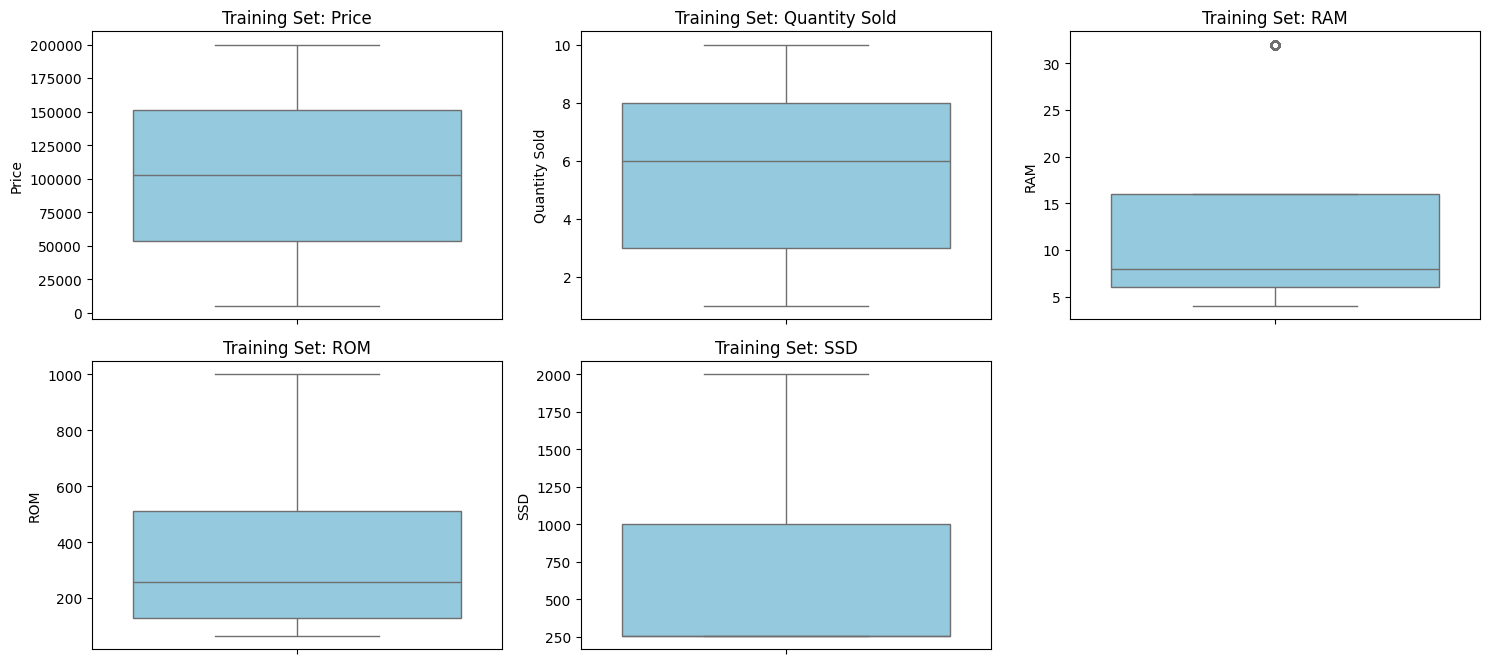

In [282]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
category_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Training Set: {col}')
plt.tight_layout()
plt.show()

In [283]:
numeric_columns

Index(['Price', 'Quantity Sold', 'RAM', 'ROM', 'SSD'], dtype='object')

duplicates? , no duplicated data

In [284]:
df.duplicated().sum()

np.int64(0)

In [285]:
df

,Product,Brand,Price,Quantity Sold,Region,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,78570,6,Central,Snapdragon 7 Gen,12,128,256
1,Laptop,Oppo,44613,1,South,Ryzen 5,8,512,256
2,Mobile Phone,Samsung,159826,5,Central,MediaTek Dimensity,8,256,256
3,Laptop,Sony,20911,1,South,i7,12,64,2000
4,Laptop,Microsoft,69832,4,East,i7,8,128,2000
...,...,...,...,...,...,...,...,...,...
49995,Laptop,Motorola,170385,6,North,i3,16,512,2000
49996,Laptop,HP,193133,4,West,i7,8,1000,512
49997,Laptop,Toshiba,66502,6,North,i5,4,64,2000
49998,Mobile Phone,Lenovo,158883,2,North,Snapdragon 7s,12,1000,256


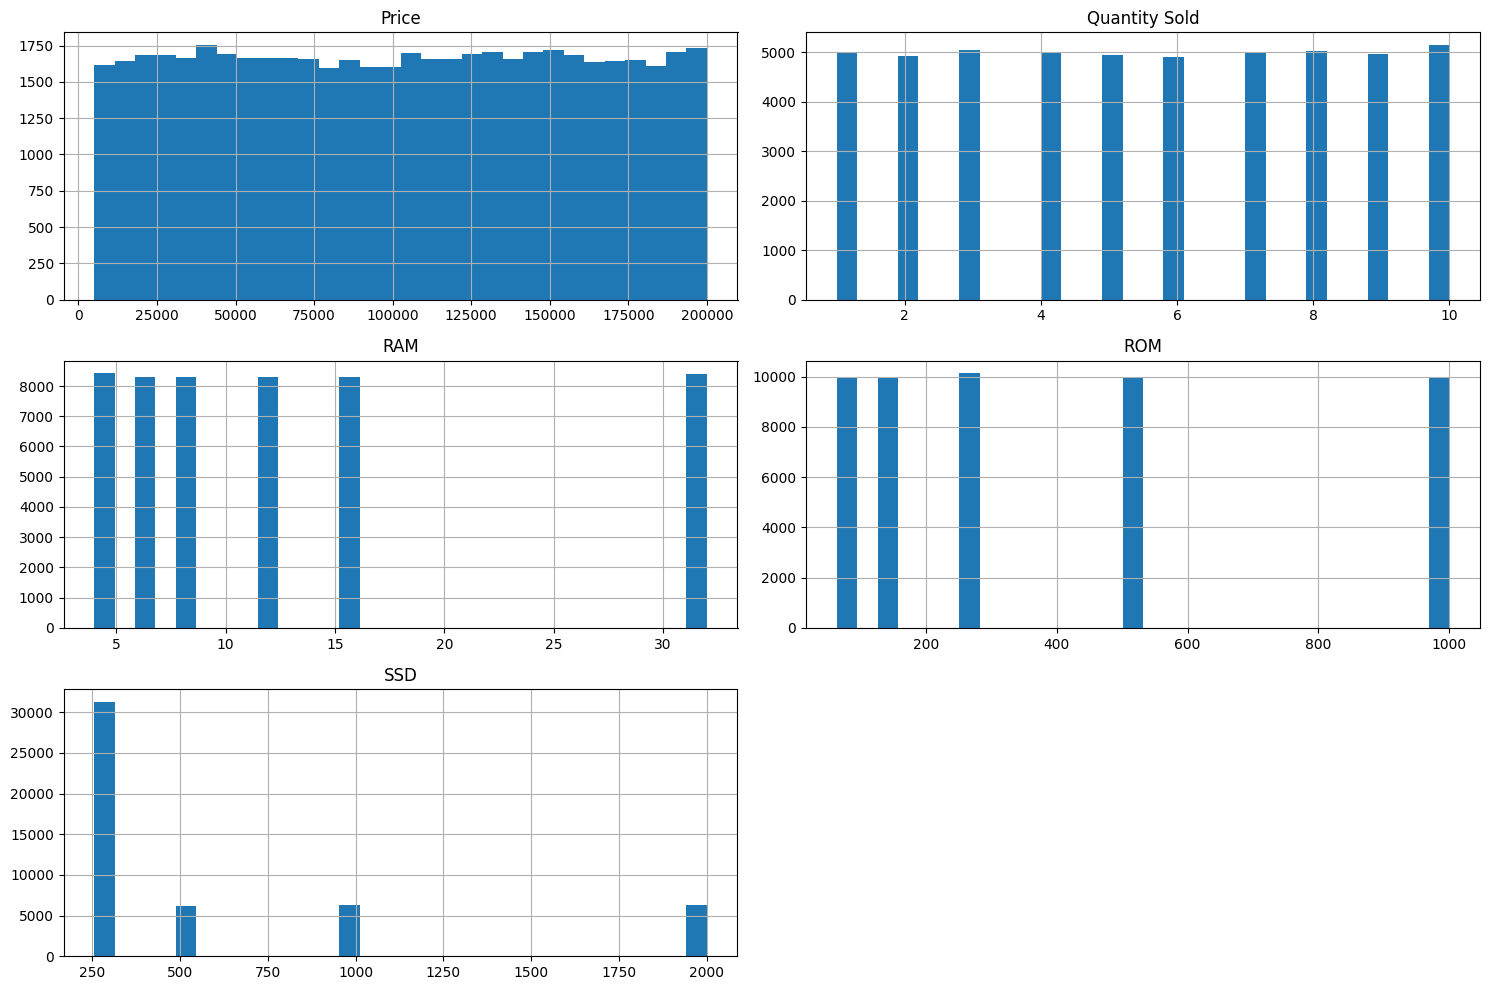

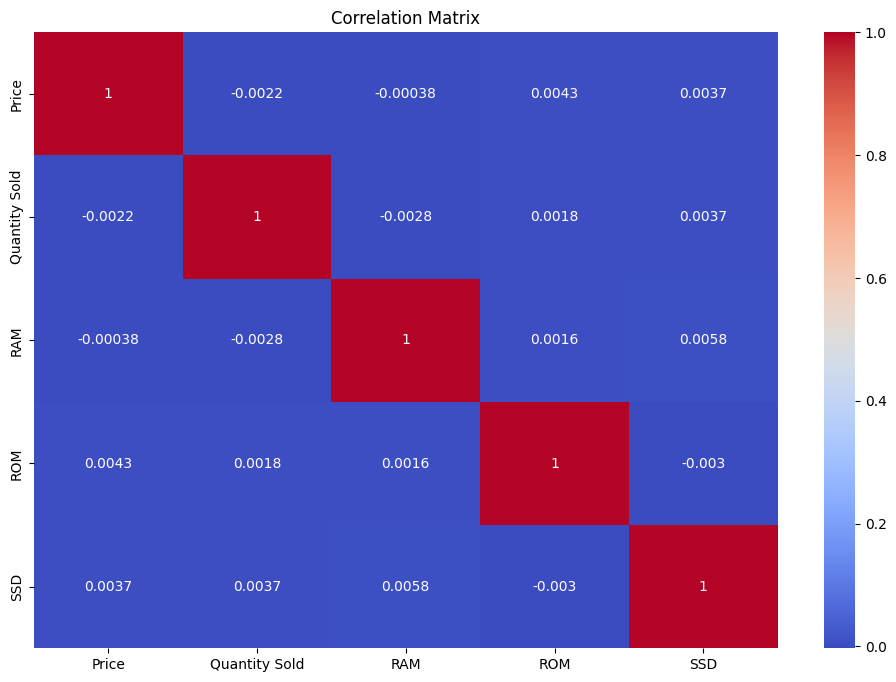

In [286]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


visualization

<ipython-input-287-d2e1f8313227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='Blues_d')


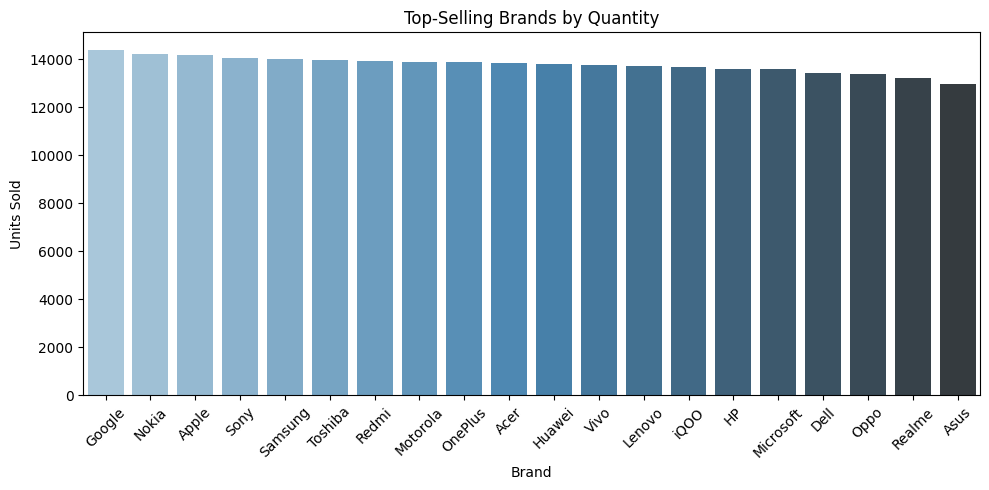

In [287]:
# Top-selling brands by quantity
plt.figure(figsize=(10,5))
brand_sales = df.groupby('Brand')['Quantity Sold'].sum().sort_values(ascending=False)
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='Blues_d')
plt.title("Top-Selling Brands by Quantity")
plt.xticks(rotation=45)
plt.ylabel("Units Sold")
plt.xlabel("Brand")
plt.tight_layout()
plt.show()

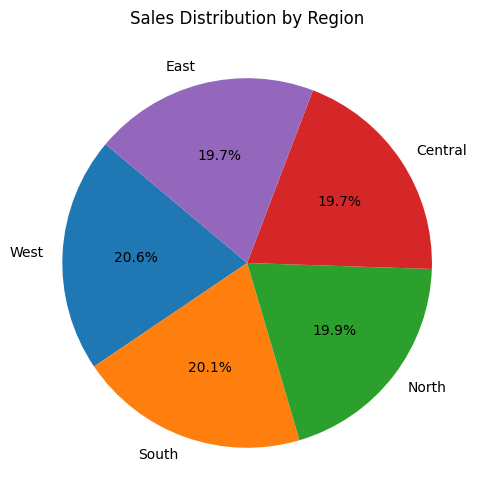

In [288]:
#  Region-wise sales distribution
plt.figure(figsize=(6,6))
region_sales = df['Region'].value_counts()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Region")
plt.show()

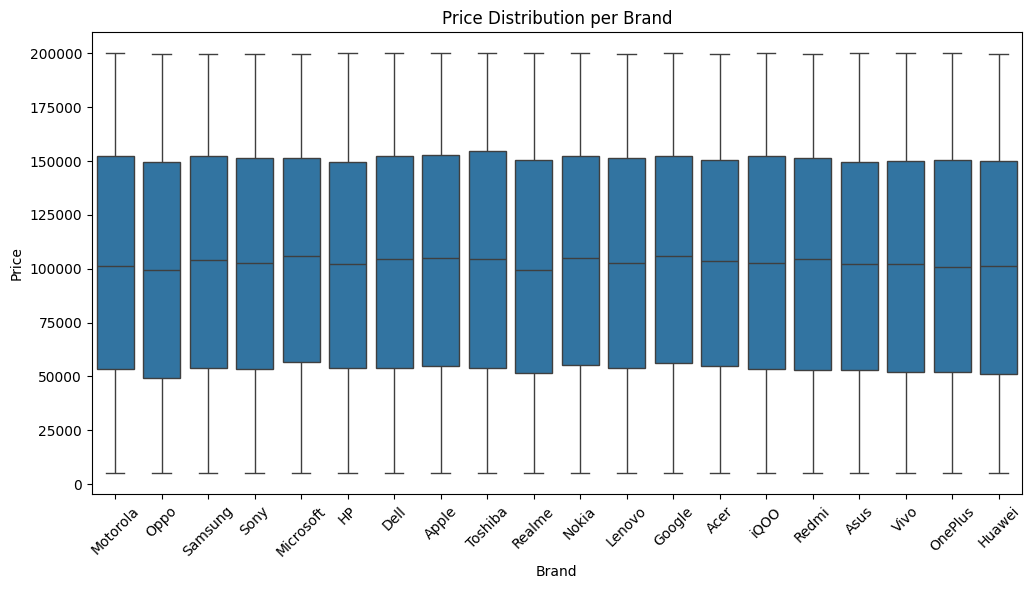

In [289]:
# Boxplot of price by brand
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Brand', y='Price')
plt.title("Price Distribution per Brand")
plt.xticks(rotation=45)
plt.show()

<ipython-input-290-fb4420797d81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df, palette='Set2')


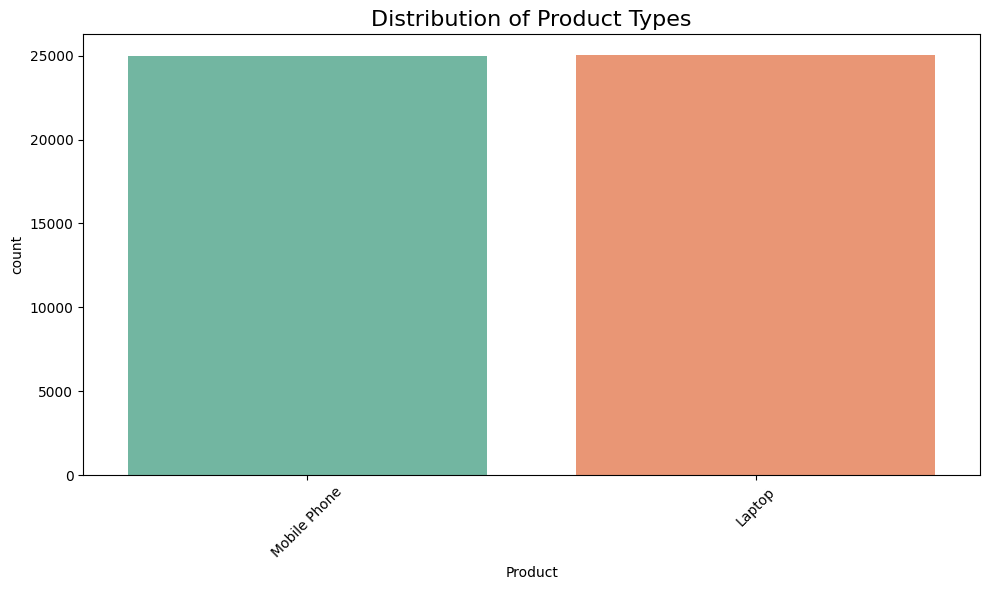

In [290]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df, palette='Set2')
plt.title('Distribution of Product Types', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

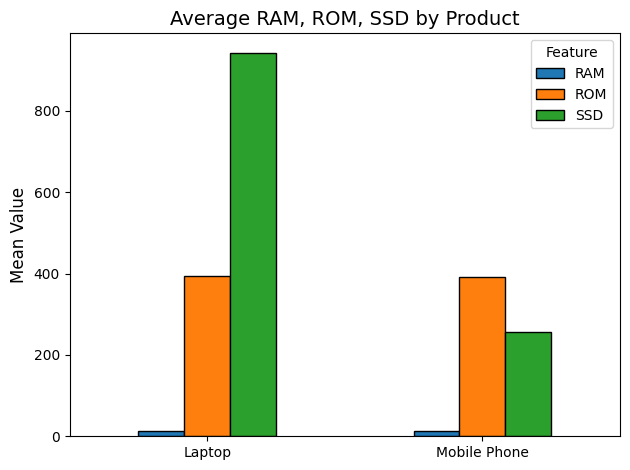

In [291]:
# Bar Chart of Average RAM, ROM, SSD by Product

mean_feats = df.groupby('Product')[['RAM','ROM','SSD']].mean().reset_index()

plt.figure(figsize=(10,6))
mean_feats.set_index('Product').plot(kind='bar', rot=0, edgecolor='black')
plt.title('Average RAM, ROM, SSD by Product', fontsize=14)
plt.ylabel('Mean Value', fontsize=12)
plt.xlabel('')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

now encoding , we need to know which column should be label encoding and which should be one-hot

Label encoding --> ['RAM', 'ROM', 'SSD', 'Product']

one hot --->['Brand', 'Processor Specification', 'Region']



In [292]:
df['Product'] = LabelEncoder().fit_transform(df['Product'])

# Check correlation with the target
correlation_with_target = df.corr(numeric_only=True)['Product'].sort_values()
print("Correlation with Target (product):")
print(correlation_with_target)


Correlation with Target (product):
SSD             -0.588300
RAM             -0.003727
Price           -0.002543
ROM             -0.001904
Quantity Sold   -0.001121
Product          1.000000
Name: Product, dtype: float64


In [293]:
one_hot_cols = ['Brand', 'Processor Specification', 'Region']
df = pd.get_dummies(df, columns=one_hot_cols)


In [294]:
df

,Product,Price,Quantity Sold,RAM,ROM,SSD,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,...,Processor Specification_Snapdragon 8 Gen,Processor Specification_i3,Processor Specification_i5,Processor Specification_i7,Processor Specification_i9,Region_Central,Region_East,Region_North,Region_South,Region_West
0,1,78570,6,12,128,256,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,44613,1,8,512,256,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,159826,5,8,256,256,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,20911,1,12,64,2000,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0,69832,4,8,128,2000,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,170385,6,16,512,2000,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
49996,0,193133,4,8,1000,512,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
49997,0,66502,6,4,64,2000,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
49998,1,158883,2,12,1000,256,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


split data

In [295]:
X = df.drop(columns=["Product"])
y = df["Product"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

 Standardize the data

In [296]:
scaler = StandardScaler()
X_train[['Price', 'Quantity Sold']] = scaler.fit_transform(X_train[['Price', 'Quantity Sold']])
X_test[['Price', 'Quantity Sold']] = scaler.transform(X_test[['Price', 'Quantity Sold']])


In [297]:
print("Feature-wise mean (training set):\n", scaler.mean_)
print("\nFeature-wise std deviation (training set):\n", scaler.scale_)

Feature-wise mean (training set):
 [1.02621735e+05 5.51962500e+00]

Feature-wise std deviation (training set):
 [5.63482044e+04 2.88046261e+00]
